# Exploratory Data Analysis

The goal is to dig into data to see how the metrics are relating to each other and also identify possible transformation for preprocessing. 

Questions to answer:
- [ ] What is the proportion of medical desert in France?
- [ ] Is there any area with an over-density of doctors?
- [ ] What factors would impact the lack of doctors in an area?
- [ ] Can an area improve the situation by playing on these factors?
- [ ] What could be the solution to improve the situation of medical desert?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df = pd.read_csv('../data/medical_desert_clean.csv')
print('Shape:',df.shape)

Sahpe: (34989, 25)


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
# Converting columns as string follwing
df.iloc[:,0] = df.iloc[:,0].astype(str).convert_dtypes()
df.dtypes

CODGEO                                  string
Communes                                string
APL                                    float64
median_living_standard                 float64
healthcare_education_establishments      Int64
density_area                           float64
annual_pop_growth                      float64
unemployment_rate                      float64
secondary_residence_rate               float64
vacant_residence_rate                  float64
active_local_business_rate             float64
city_social_amenities_rate             float64
0_14_pop_rate                          float64
15_59_pop_rate                         float64
60+_pop_rate                           float64
mobility_rate                          float64
average_birth_rate                     float64
CSP1_rate                              float64
CSP2_rate                              float64
CSP3_rate                              float64
CSP4_rate                              float64
CSP5_rate    

In [14]:
df.describe()

,APL,median_living_standard,healthcare_education_establishments,density_area,annual_pop_growth,unemployment_rate,secondary_residence_rate,vacant_residence_rate,active_local_business_rate,city_social_amenities_rate,...,mobility_rate,average_birth_rate,CSP1_rate,CSP2_rate,CSP3_rate,CSP4_rate,CSP5_rate,CSP6_rate,CSP7_rate,CSP8_rate
count,34989.000000,34989.000000,34989.000000,34989.000000,34989.000000,34989.000000,34989.000000,34989.000000,34989.000000,34989.000000,...,3.498900e+04,34989.000000,34989.000000,34989.000000,34989.000000,34989.000000,34989.000000,34989.000000,34989.000000,34989.000000
mean,3.156094,20773.052347,0.029724,182.073483,0.300595,8.271189,13.305151,8.528824,45.746942,13.065318,...,1.017086e+00,1.024332,3.328085,4.299023,5.697024,13.220805,15.407682,14.765427,30.996735,12.265213
std,1.273401,2894.464863,0.396736,981.656545,1.743309,3.616850,15.284405,4.608338,15.904740,7.585260,...,6.750170e-01,0.406039,5.275842,3.737338,5.090049,6.598653,6.219868,7.295628,11.051101,6.150436
min,0.000000,10932.000000,0.000000,0.025880,-18.938692,0.000000,0.000000,0.000000,0.000000,0.000000,...,-8.575516e-13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.368000,18985.000000,0.000000,18.598383,-0.637446,5.960265,2.713458,5.311381,35.714286,8.247423,...,6.237116e-01,0.775623,0.000000,2.069499,2.319572,8.985507,12.110865,10.000000,23.883807,8.823529
50%,3.102000,20323.190476,0.000000,40.712074,0.228835,7.797538,7.581322,7.764177,47.058824,11.764706,...,9.803922e-01,1.010830,1.388889,3.755604,4.761905,13.084112,15.535406,14.285714,29.892645,11.956522
75%,3.885000,22010.833333,0.000000,96.577947,1.195559,10.084034,18.090330,11.025422,57.142857,16.315789,...,1.339655e+00,1.253980,4.347826,5.807195,7.954545,17.202769,18.744535,18.859705,37.037037,15.183981
max,34.547000,48288.095238,28.000000,40059.128065,38.520495,52.156102,96.879433,53.505535,100.000000,100.000000,...,1.250000e+01,4.705882,100.000000,100.000000,100.000000,66.666667,100.000000,83.333333,100.000000,100.000000


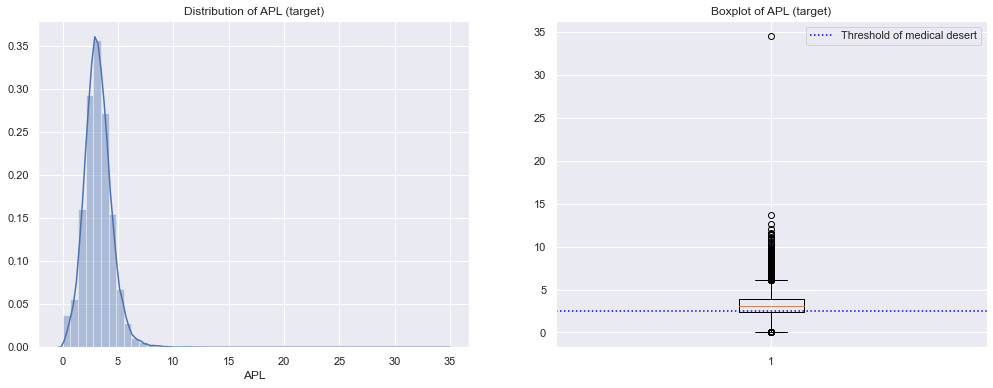

In [35]:
fig, [ax1,ax2] = plt.subplots(1,2, figsize=(17,6))

sns.distplot(df.APL, ax=ax1)
ax1.set_title('Distribution of APL (target)')


ax2.boxplot(df.APL)
xmin, xmax = ax2.get_xlim()
ax2.hlines(2.5,xmin=xmin,xmax=xmax, colors='blue', linestyle='dotted',label='Threshold of medical desert')
ax2.set_title('Boxplot of APL (target)')

plt.legend()
plt.show()

The target is almost perfectly normally distributed. It is slightly right-skewed because of outliers with city having really high APL indicator. 

We can conclude that there is inequality with some city having 0 as indicator of APL (residents have potentially 0/consultation/year around 20min drive) and some city have

In [36]:
df[df.APL<2.5]

,CODGEO,Communes,APL,median_living_standard,healthcare_education_establishments,density_area,annual_pop_growth,unemployment_rate,secondary_residence_rate,vacant_residence_rate,...,mobility_rate,average_birth_rate,CSP1_rate,CSP2_rate,CSP3_rate,CSP4_rate,CSP5_rate,CSP6_rate,CSP7_rate,CSP8_rate
0,01001,L'Abergement-Clémenciat,2.396,22679.000000,0,48.087774,-0.335578,7.127430,4.597701,7.471264,...,2.216428,1.060116,2.479339,3.305785,12.396694,15.702479,16.528926,20.661157,23.966942,4.958678
4,01006,Ambléon,0.912,21656.888889,0,18.707483,-0.359722,11.111111,16.216216,12.162162,...,2.727273,1.621622,0.000000,0.000000,5.555556,27.777778,16.666667,16.666667,27.777778,5.555556
8,01010,Anglefort,2.183,22880.555556,0,38.414217,1.742295,7.726597,13.936624,8.755059,...,0.807175,1.058005,2.923977,4.093567,5.263158,12.280702,20.467836,22.222222,20.467836,12.280702
9,01011,Apremont,1.519,23246.086957,0,26.286891,0.476717,7.589286,11.308490,8.615992,...,1.329787,1.109643,1.724138,1.724138,12.068966,20.689655,6.896552,8.620690,39.655172,8.620690
10,01012,Aranc,1.460,21178.119048,0,15.057737,1.274296,9.769695,23.763689,9.505475,...,0.613500,0.949367,1.886857,7.547428,1.886857,9.434285,16.981713,15.093145,39.623998,7.545716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34960,97357,Grand-Santi,0.000,14377.777778,0,3.517045,6.094337,16.039789,2.533380,1.824034,...,2.668963,2.982862,0.000000,0.459418,1.071975,2.143951,5.053599,3.062787,0.000000,88.208270
34961,97358,Saint-Élie,0.000,14023.913043,0,0.025880,-18.938692,0.000000,0.000000,34.341938,...,0.000000,0.000000,2.127660,10.638298,2.127660,4.255319,6.382979,63.829787,2.127660,8.510638
34962,97360,Apatou,0.489,14450.303030,0,4.369307,4.819949,52.156102,0.993448,1.159023,...,2.490808,2.106196,0.104167,0.104167,0.520833,5.520833,3.958333,1.145833,0.833333,87.812500
34963,97361,Awala-Yalimapo,0.894,13685.051760,0,7.433298,1.313687,49.511002,3.098592,8.450704,...,2.440775,1.630838,0.000000,1.086957,0.543478,4.347826,19.565217,11.956522,7.065217,55.434783
